#Percent of gene nucleotides that are introns in Drosophila
The purpose of this script is to determine the percentage of nucleotides found in a gene that are introns (as compared to exons).

##First we'll look at Drosophila

In [2]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
textfile = open("mrna-dme1.txt", 'r')
filetext = textfile.read()
textfile.close()
int_matches = re.findall("intr_sum:.......", filetext)
ex_matches = re.findall("ex_sum:.......", filetext)

In [4]:
len(int_matches)

15624

now that I have all the intr_sums, I want to extract the numbers and sum them.

In [5]:
type(int_matches)

list

In [6]:
int_str = ''.join(int_matches)
[int(s) for s in int_str.split() if s.isdigit()]
introns = re.findall(r'\b\d+\b', int_str)
# convert from list ot string
introns = map(int, introns)
dme_int_total = sum(introns)

In [7]:
[int(s) for s in int_str.split() if s.isdigit()]

[]

Now I can follow the same procedure to extract the total length of exons.

In [8]:
len(ex_matches)

15624

In [9]:
ex_str = ''.join(ex_matches)
[int(s2) for s2 in ex_str.split() if s2.isdigit()]
exons = re.findall(r'\b\d+\b', ex_str)
exons = map(int, exons)
dme_ex_total = sum(exons)

In [10]:
exons[0:10]

[1005, 730, 3224, 3224, 1570, 1751, 1819, 1855, 1823, 1570]

In [11]:
introns[0:10]

[224, 3094, 1280, 1280, 9533, 3290, 3222, 3186, 3218, 9533]

In [12]:
type(exons)

list

In [13]:
import pandas as pd
s = pd.Series(introns, exons)

In [14]:
s.to_csv('intron.csv')

In [35]:
s

1005       224
730       3094
3224      1280
3224      1280
1570      9533
1751      3290
1819      3222
1855      3186
1823      3218
1570      9533
2518      6974
3117      6948
3117      6948
11513    61498
1744       136
1738       142
3521     18710
3521     18710
3521     18710
1241        49
1353        58
2542       236
2542       236
2784     37632
3572     30670
3572     30670
3423     24100
850       3581
2692     27731
2692     27731
         ...  
1039      1126
2614      2749
2569      2794
3744      1619
3744      1619
1541       887
1353       395
1228       295
2524       323
3210      9479
3210      9479
3210      9479
3160      1465
1482       454
1494       224
1181        91
2473      4770
2473      4770
2647      2411
2647      2411
5740     14529
4724     12520
4715     12032
4513     11203
2468     24358
3764       353
2624      1281
1014       513
1593       181
1937     47143
dtype: int64

In [15]:
dme_int_total

86023098

In [16]:
dme_ex_total

39288681

In [17]:
dme_int_total = float(dme_int_total)
dme_ex_total = float(dme_ex_total)

In [18]:
dme_int_total/(dme_int_total+dme_ex_total)

0.6864725621683178

##Now I can perform the same analysis for the human genome.

##And now I can input any mRNA file from the fedorov lab database.
http://bpg.utoledo.edu/~afedorov/lab/eid.html

In [40]:
def intronPercent(file):
    # read in the data
    textfile = open(file, 'r')
    filetext = textfile.read()
    textfile.close()
    # pull out the pieces of data I want
    int_matches = re.findall("intr_sum:.......", filetext)
    ex_matches = re.findall("ex_sum:.......", filetext)

    # convert list to string
    int_str = ''.join(int_matches)
    ex_str = ''.join(ex_matches)
    # pull out numbers
    [int(s) for s in int_str.split() if s.isdigit()]
    [int(s2) for s2 in ex_str.split() if s2.isdigit()]

    introns = re.findall(r'\b\d+\b', int_str)
    exons = re.findall(r'\b\d+\b', ex_str)

    introns = map(int, introns)
    exons = map(int, exons)

    int_total = sum(introns)
    ex_total = sum(exons)

    int_total = float(int_total)
    ex_total = float(ex_total)
    
    # multiply by 100 to convert to a percentage
    
    return 100*(int_total/(int_total+ex_total))

In [41]:
cow = intronPercent("mrna-Bt3p1.txt")

In [42]:
arabidopsis = intronPercent("mrna-arabidopsis2005.txt")

In [43]:
c_elegans = intronPercent("mrna-ce2003.txt")

In [44]:
drosophila = intronPercent("mrna-dme1.txt")

In [45]:
grape = intronPercent("mrna-grape2009.txt")

In [46]:
human1 = intronPercent("mrna-h36p1.txt")

In [47]:
human2 = intronPercent("mrna-hs35p1.txt")

In [48]:
human3 = intronPercent("mrna-hs37.txt")

In [49]:
moss = intronPercent("mrna-moss2011.txt")

In [50]:
mouse = intronPercent("mrna-mouse.txt")

In [51]:
mouse2 = intronPercent("mrna-mouse2010.txt")

In [52]:
populus = intronPercent("mrna-populus2007.txt")

In [53]:
rice = intronPercent("mrna-rice2006.txt")

data = [
    go.Bar(
        x=['cow', 'arabidop', 'celegans', 'drosophila',
          'grape', 'human1', 'human2', 'human3', 'moss',
          'mouse', 'mouse2', 'populus', 'rice'],
        y=[cow, arabidop, celegans, drosophila,
          grape, human1, human2, human3, moss,
          mouse, mouse2, populus, rice]
    )
]
py.plot(data)

In [33]:
species = ('human1', 'human2', 'human3', 'cow', 'mouse', 'mouse2',
          'drosophila', 'c_elegans', 'grape', 'populus', 'rice', 'moss',
          'arabidopsis')

y = [human1, human2, human3, cow, mouse, mouse2,
    drosophila, c_elegans, grape, populus, rice, moss,
    arabidopsis]




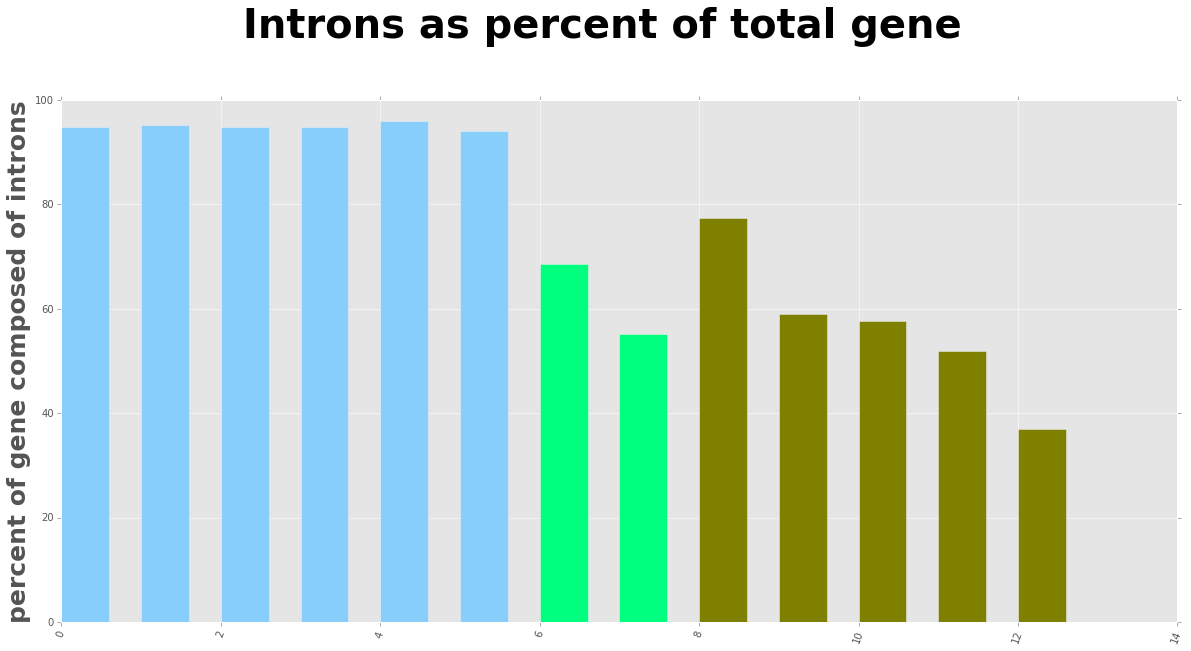

In [34]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Introns as percent of total gene',
             fontsize=40,
             fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_ylabel('percent of gene composed of introns',
             fontsize=25,
             fontweight='bold')

N = len(y)
ind = np.arange(N)    # the x locations for the groups

width = 0.6    # the width of the bars

pos = np.arange(13)  
# xticks(pos, 
#       species,
#       fontsize=25,
#       fontweight='bold')

colors=['lightskyblue','lightskyblue',
       'lightskyblue','lightskyblue',
       'lightskyblue','lightskyblue',
       'springgreen', 'springgreen',
       'olive', 'olive', 'olive',
       'olive', 'olive']

plt.bar(ind, y, width, color=colors)

plt.xticks(rotation=70)

label_size = 15
# mpl.rcParams['ytick.labelsize'] = label_size 

# savefig('intron-percent.pdf',bbox_inches='tight')
plt.show()


In [100]:
    textfile = open('mrna-rice2006.txt', 'r')
    filetext = textfile.read()
    textfile.close()
    # pull out the pieces of data I want
    int_matches = re.findall("intr_sum:.......", filetext)
    ex_matches = re.findall("ex_sum:.......", filetext)

    # convert list to string
    int_str = ''.join(int_matches)
    ex_str = ''.join(ex_matches)
    # pull out numbers
    [int(s) for s in int_str.split() if s.isdigit()]
    [int(s2) for s2 in ex_str.split() if s2.isdigit()]

    introns = re.findall(r'\b\d+\b', int_str)
    exons = re.findall(r'\b\d+\b', ex_str)

    introns = map(int, introns)
    exons = map(int, exons)

    #int_total = sum(introns)
    #ex_total = sum(exons)

    #int_total = float(int_total)
    #ex_total = float(ex_total)
    
    import pandas as pd
    s = pd.Series(introns, exons)
    s.to_csv('rice-introns.csv')
    

In [101]:
len(introns)

20095

In [102]:
len(exons)

20095